In [1]:
#importing the necessary libraries
import numpy as np # NumPy for numerical operations
import pandas as pd # pandas for data handling and manipulation
from sklearn.preprocessing import LabelEncoder # For encoding categorical labels
import matplotlib.pyplot as plt # For plotting graphs
import nltk  # Natural Language Toolkit for text processing
import seaborn as sns  # For data visualization
from nltk.corpus import stopwords  # For stop words removal
import string  # For string manipulation
from nltk.stem import PorterStemmer  # For stemming words
from wordcloud import WordCloud  # For generating word clouds
from collections import Counter  # For counting word frequencies
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For text vectorization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  # Naive Bayes models for classification
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix  # For evaluating models

In [2]:
#reading the csv file
x = pd.read_csv("sms-spam.csv", date_format='utf-8') # Load the SMS spam dataset
x   # Display the dataframe

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
x.shape # Display the number of rows and columns

(5572, 5)

In [4]:
x.info  # Get information about the dataset columns, types, and missing data

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [5]:
# Dropping unnecessary columns
x.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True) # Remove unwanted columns

x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# Renaming columns for clarity
x.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True) # Rename columns to 'result' (spam or not) and 'input' (text message)
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Encoding the 'result' column as numerical values (spam = 1, not spam = 0)
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])

x.head() # Displaying the first few rows of the dataframe

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
x.isnull().sum() # Check for missing values

result    0
input     0
dtype: int64

In [10]:
x.duplicated().sum() # Check for duplicate rows

np.int64(403)

In [11]:
x = x.drop_duplicates(keep='first') # Remove duplicates, keeping the first occurrence
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
# Checking the distribution of the target variable ('result' column)
x['result'].value_counts() # Count occurrences of spam (1) and non-spam (0)

result
0    4516
1     653
Name: count, dtype: int64

In [13]:
653*100.0/5169 # Calculate the percentage of spam messages

12.633004449603405

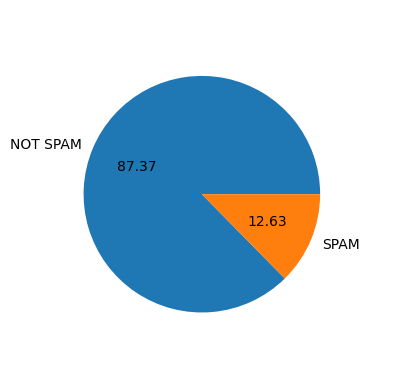

In [14]:
# Plotting a pie chart of the spam vs non-spam distribution
plt.pie(x['result'].value_counts(), labels = ['NOT SPAM', 'SPAM'], autopct= '%0.2f', radius = 0.8)
plt.show()

In [15]:
# Downloading necessary NLTK resources
nltk.download('punkt') # Download word tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Calculating the number of words and sentences in each message
x['countCharacters'] = x['input'].apply(len) # Number of words in each message

x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i))) # Number of words in each message

x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i))) # Number of sentences in each message

C:\Users\Dell\AppData\Local\Temp\ipykernel_15796\2698727411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countCharacters'] = x['input'].apply(len)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15796\2698727411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
C:\Users\Dell\AppData\Local\Temp\ipykernel_15796\2698727411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [17]:
x.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
 # Get descriptive statistics
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# Non-spam messages statistics
x[x['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# Spam messages statistics
x[x['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countWords', ylabel='Count'>

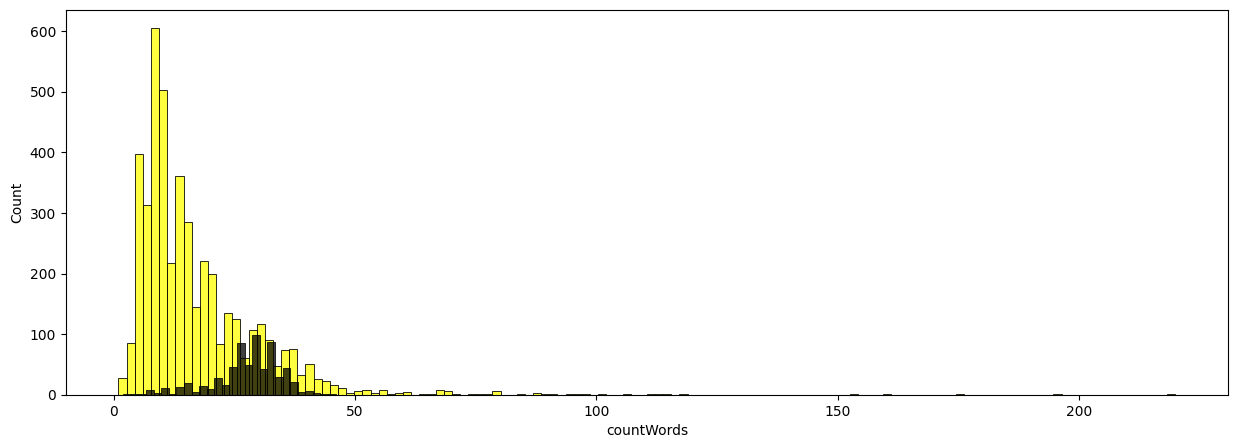

In [21]:
# Plotting histograms for word count distribution between spam and non-spam messages
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countWords'], color = "black")

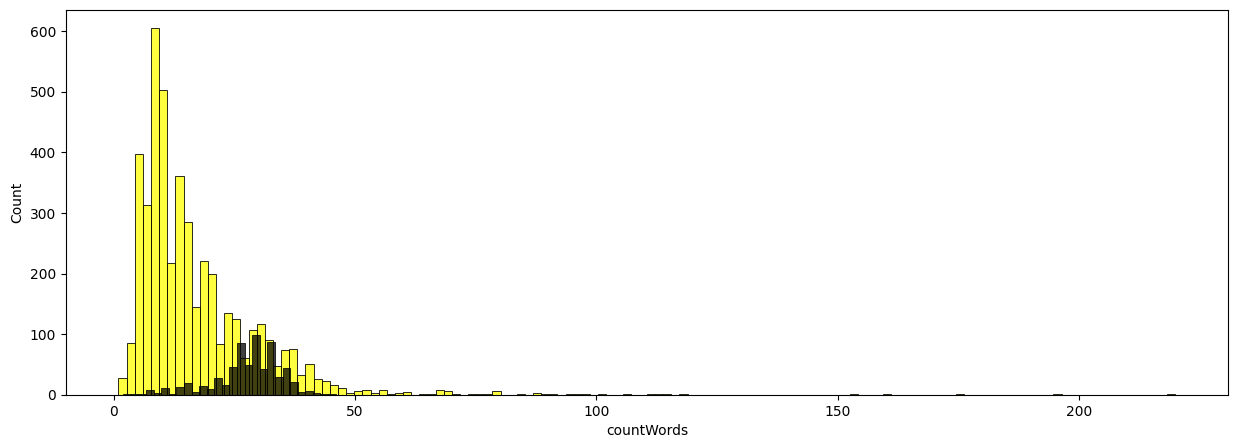

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(x[x['result'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countWords'], color = "black")
plt.show()

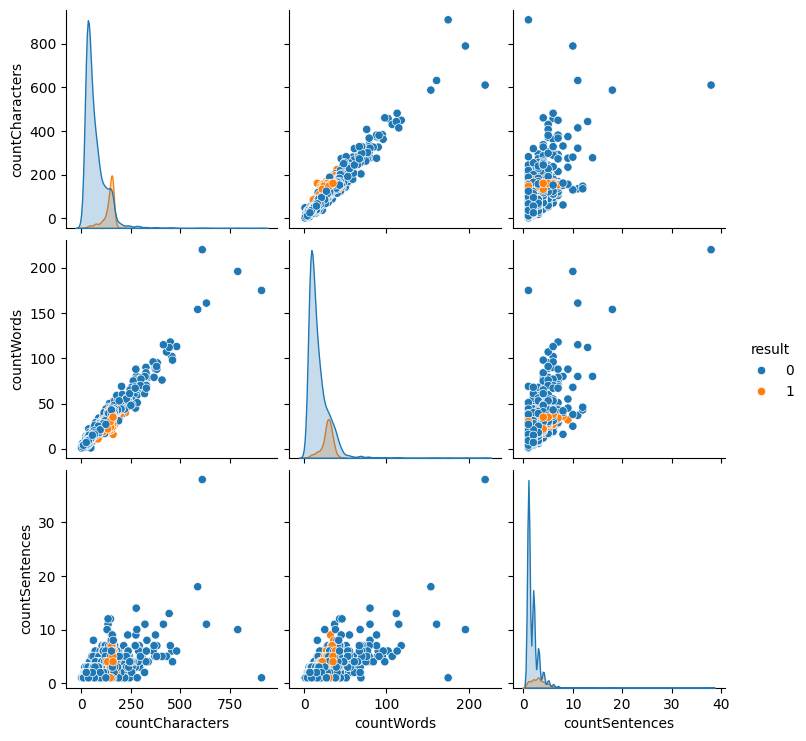

In [24]:
# Pairplot to visualize relationships between variables colored by 'result'
sns.pairplot(x, hue='result')

In [25]:
# Download stopwords for text processing
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# Function to preprocess text data: lowercasing, tokenization, removing stopwords, punctuation, and stemming

def transform_text (text):

    text = text.lower() # Convert to lowercase


    text = nltk.word_tokenize(text) # Tokenize the text into words


    removedSC = list()

    for i in text:
        if i.isalnum():  # Keep only alphanumeric words
            removedSC.append(i)

    
    text = removedSC[:] # Assign cleaned list back to 'text'


    removedSWPC = list() # List to store words after stopword and punctuation removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # Remove stopwords and punctuation
            removedSWPC.append(i)

    

    text = removedSWPC[:] # Assign cleaned list back to 'text'

    ps = PorterStemmer()  # Initialize the PorterStemmer for stemming
    stemmed = list()  # List to store stemmed words
    for i in text:
        stemmed.append(ps.stem(i))  # Apply stemming

    text = stemmed[:]  # Assign stemmed words back to 'text'

    return " ".join(text)  # Return the processed text as a string

In [27]:
# Apply the text transformation function to each message in the dataset
x['processed'] = x['input'].apply(transform_text)
x.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15796\1507381486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['processed'] = x['input'].apply(transform_text)


,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
# Generate word clouds for spam and non-spam messages
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white') # Initialize WordCloud object

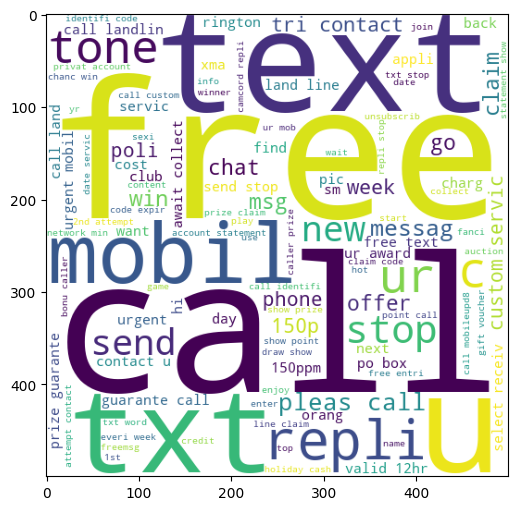

In [29]:
# Create and display word cloud for spam messages
spamWC = wc.generate(x[x['result'] == 1]['processed'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spamWC)

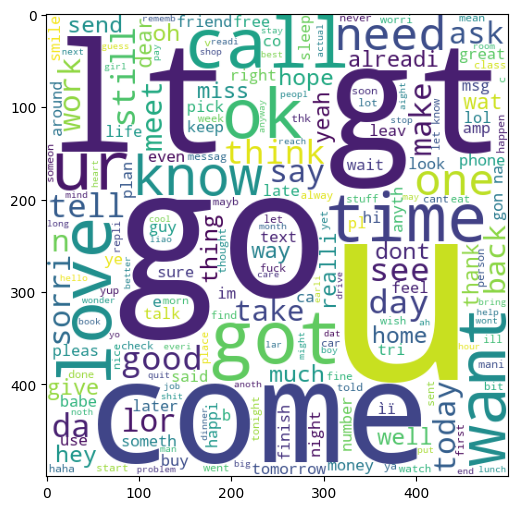

In [31]:
spamWC = wc.generate(x[x['result'] == 0]['processed'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spamWC)

In [32]:
# Collect and count the most common words in spam messages
spamWords = list()

for msg in x[x['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word) # Append each word in the spam message


spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [33]:
# Count the most frequent words in the spam messages
spamWordsDictonary = Counter(spamWords)
spamWordsDictonary.most_common(40) # Get the 40 most common words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [34]:
# Create a dataframe with the most common spam words
mostCommonSPAM = pd.DataFrame(spamWordsDictonary.most_common(40))

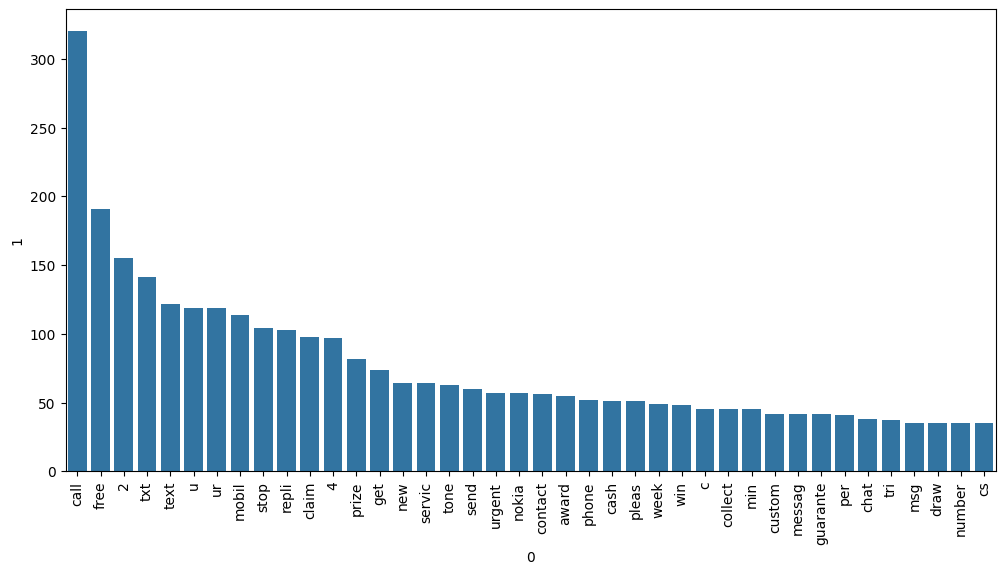

In [35]:
# Plot a bar chart of the 40 most common spam words
plt.figure(figsize=(12,6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [36]:
# Initialize CountVectorizer for text vectorization
cv = CountVectorizer()

In [38]:
# Convert the text data into a bag-of-words representation
X = cv.fit_transform(x['processed']).toarray()  # Transform the processed text into feature vectors
X.shape

(5169, 6708)

In [39]:
# Define the target variable
y = x['result'].values   # Target variable: spam (1) or not spam (0)
y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [41]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [42]:
# Train Gaussian Naive Bayes model
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) # Predict on the test data
print(accuracy_score(y_test, y_pred1)) # Accuracy score
print(confusion_matrix(y_test, y_pred1)) # Confusion matrix
print(precision_score(y_test, y_pred1)) # Precision score

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [45]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [46]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [48]:
# Initialize TfidfVectorizer for TF-IDF vectorization
tf = TfidfVectorizer()
# Convert the text data into TF-IDF representation
X = tf.fit_transform(x['processed']).toarray()
# Split the data into training and testing sets again
y = x['result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [49]:
# Train the models again using TF-IDF features
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [51]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [52]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [53]:
# Save the trained models and vectorizer using pickle
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))